# Geographic Data Visualization

## Preliminary Setup and Visualization

### Imports

In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

### Reading data

In [2]:
boston = gpd.read_file('./data/geographic-data/climate-ready/c7230a7a-4081-4743-b911-e18f66e1beca2020330-1-17gw6be.a4ds.shp')
boston.head(1)

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Are,Shape__Len,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.0,6036.192907,"POLYGON ((-7913698.771 5212638.332, -7913724.4..."


### Basic Visualization 

<Axes: >

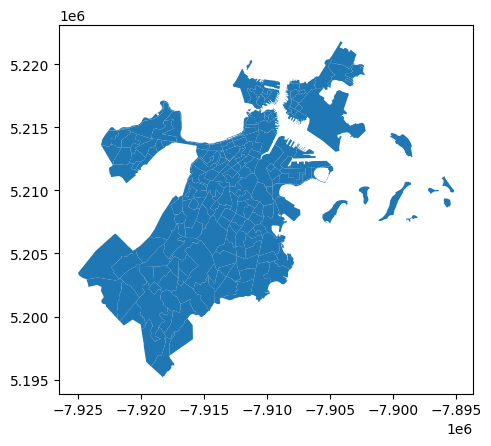

In [3]:
boston.plot()

In [4]:
b_ns = list(pd.unique(boston.Name))
b_ns

['Mission Hill',
 'Fenway',
 'Back Bay',
 'Allston',
 'Brighton',
 'Jamaica Plain',
 'Roslindale',
 'Hyde Park',
 'West Roxbury',
 'Mattapan',
 'Dorchester',
 'East Boston',
 'North End',
 'West End',
 'Longwood Medical Area',
 'Roxbury',
 'South Boston Waterfront',
 'Charlestown',
 'South End',
 'Bay Village',
 'Leather District',
 'South Boston',
 'Harbor Islands']

<Axes: >

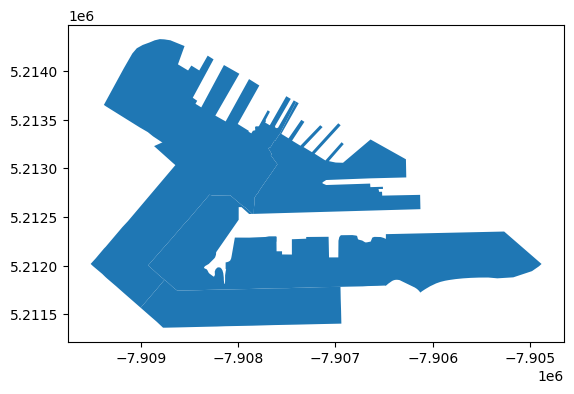

In [5]:
boston[boston.Name == "South Boston Waterfront"].plot()

### More Advanced Visualization

#### Medical Illness Template

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

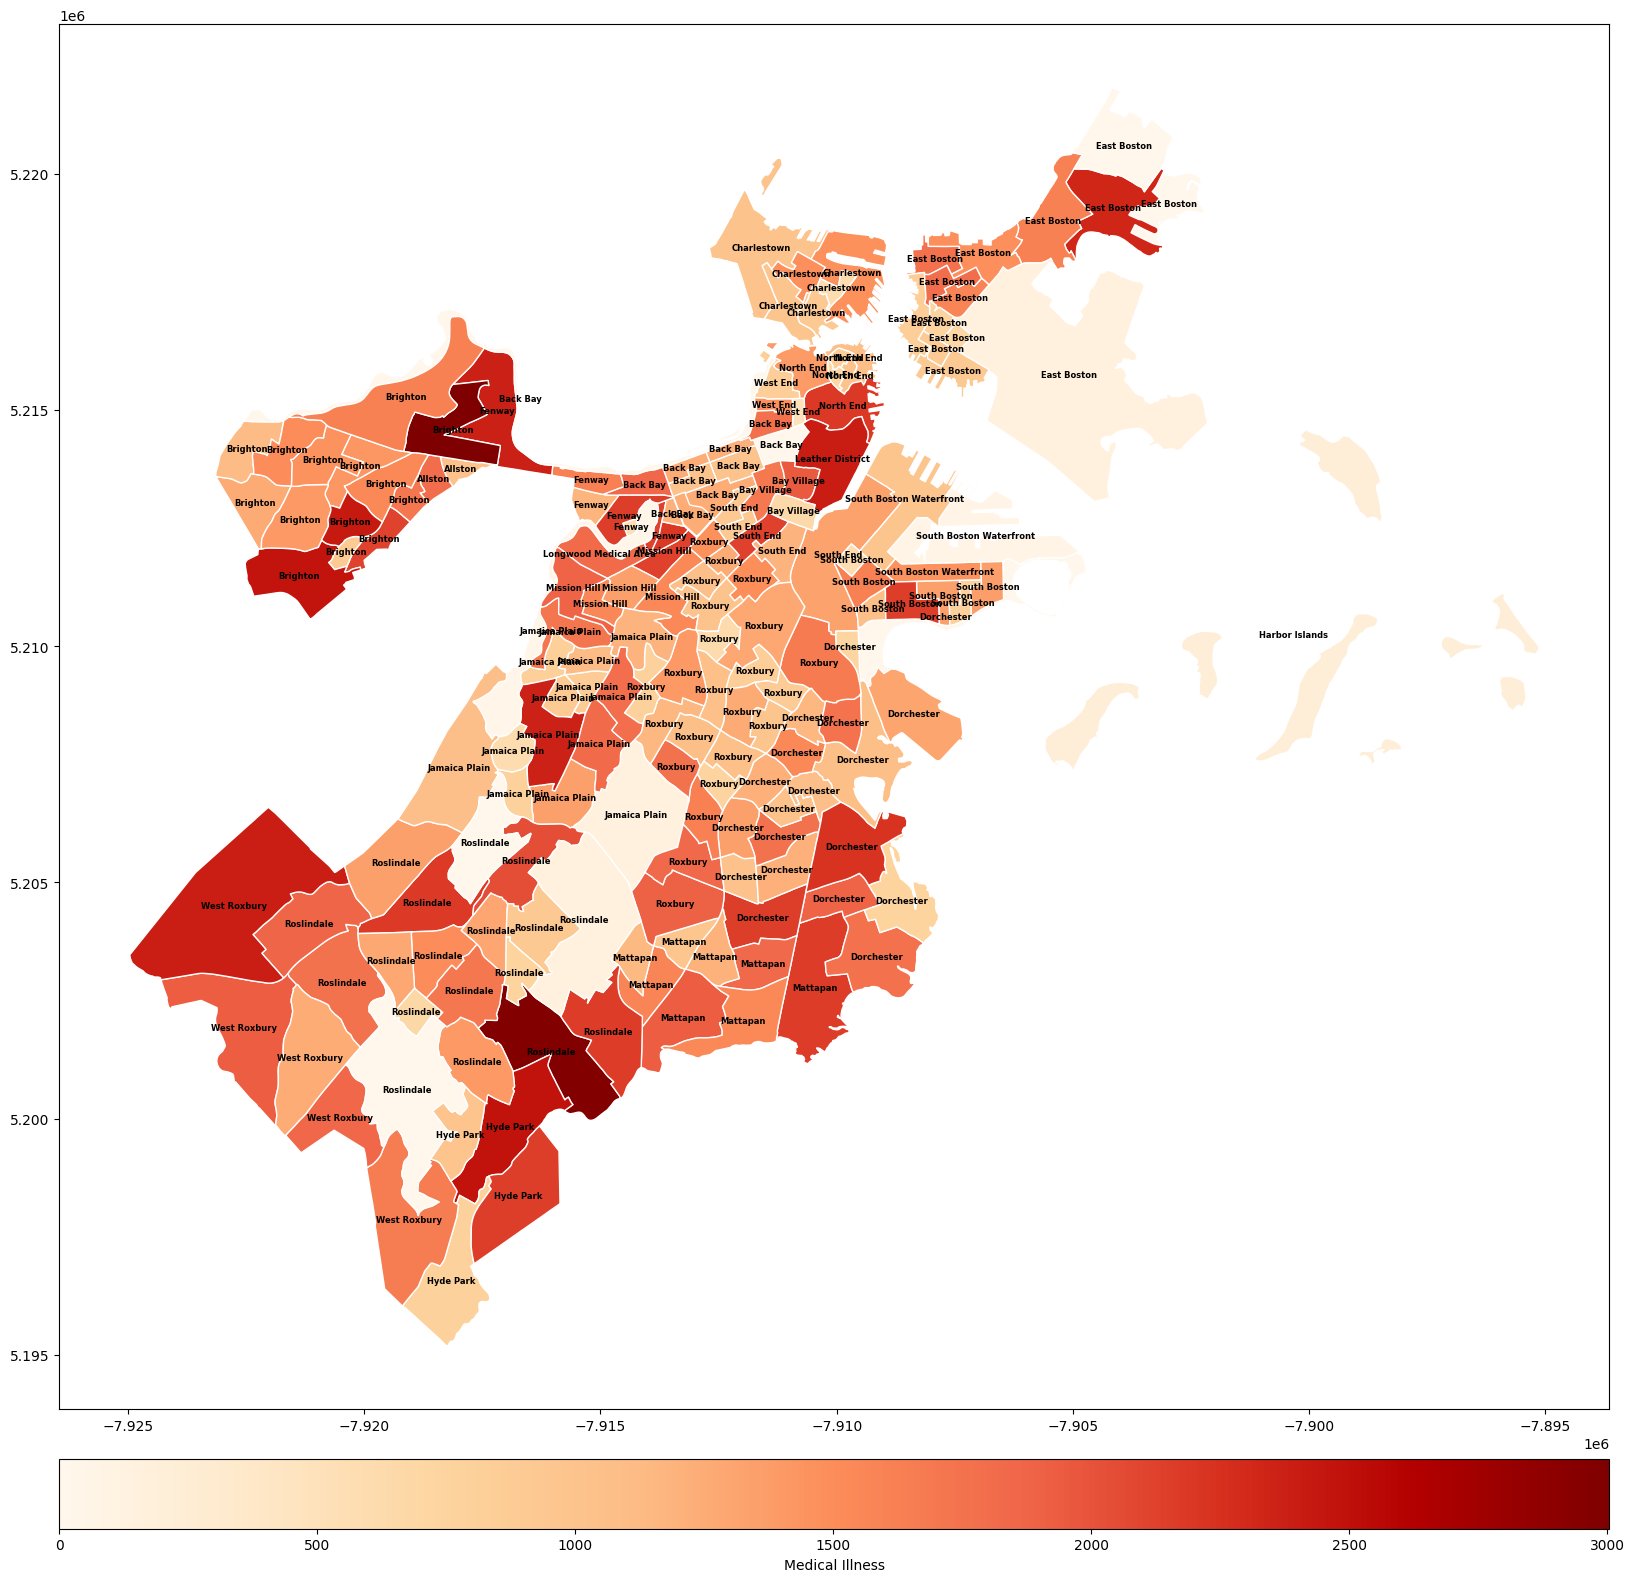

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.5)

boston.plot(
    column="MedIllnes",
    cmap='OrRd',
    edgecolor="w",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Medical Illness", "orientation": "horizontal"}
)

for _, row in boston.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    name = row['Name']
    ax.text(x, y, name, fontsize=6, ha='center', va='center', color='k', weight='bold')

plt.show()

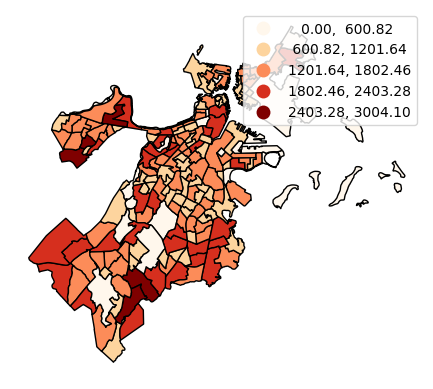

In [8]:
ax = boston.plot(
    column="MedIllnes",
    cmap='OrRd',
    edgecolor='k',
    scheme='equal_interval',
    legend=True
)

ax.set_axis_off()

#### Graphing All Features in Likewise Fashion

In [9]:
def create_plots_for_features(gdf, features):
    columns = 2
    rows = -(-len(features) // columns)
    fig, axs = plt.subplots(rows, columns, figsize=(16, rows*8))
    axs = axs.flatten()
    for i, feature in enumerate(features):
        ax = axs[i]
        gdf.plot(
            ax=ax,
            column=feature,
            cmap='OrRd',
            edgecolor='k',
            scheme='equal_interval',
            legend=True
        )
        ax.set_axis_off()
        ax.set_title(feature)

    for j in range(len(features), len(axs)):
        axs[j].set_visible(False)
    
    return fig

In [10]:
features_to_graph = [f for f in list(boston.columns) if f not in ['Name', 'Shape__Are', 'Shape__Len', 'geometry', 'GEOID10', 'FID']]

/tmp/ipykernel_223634/3384610196.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


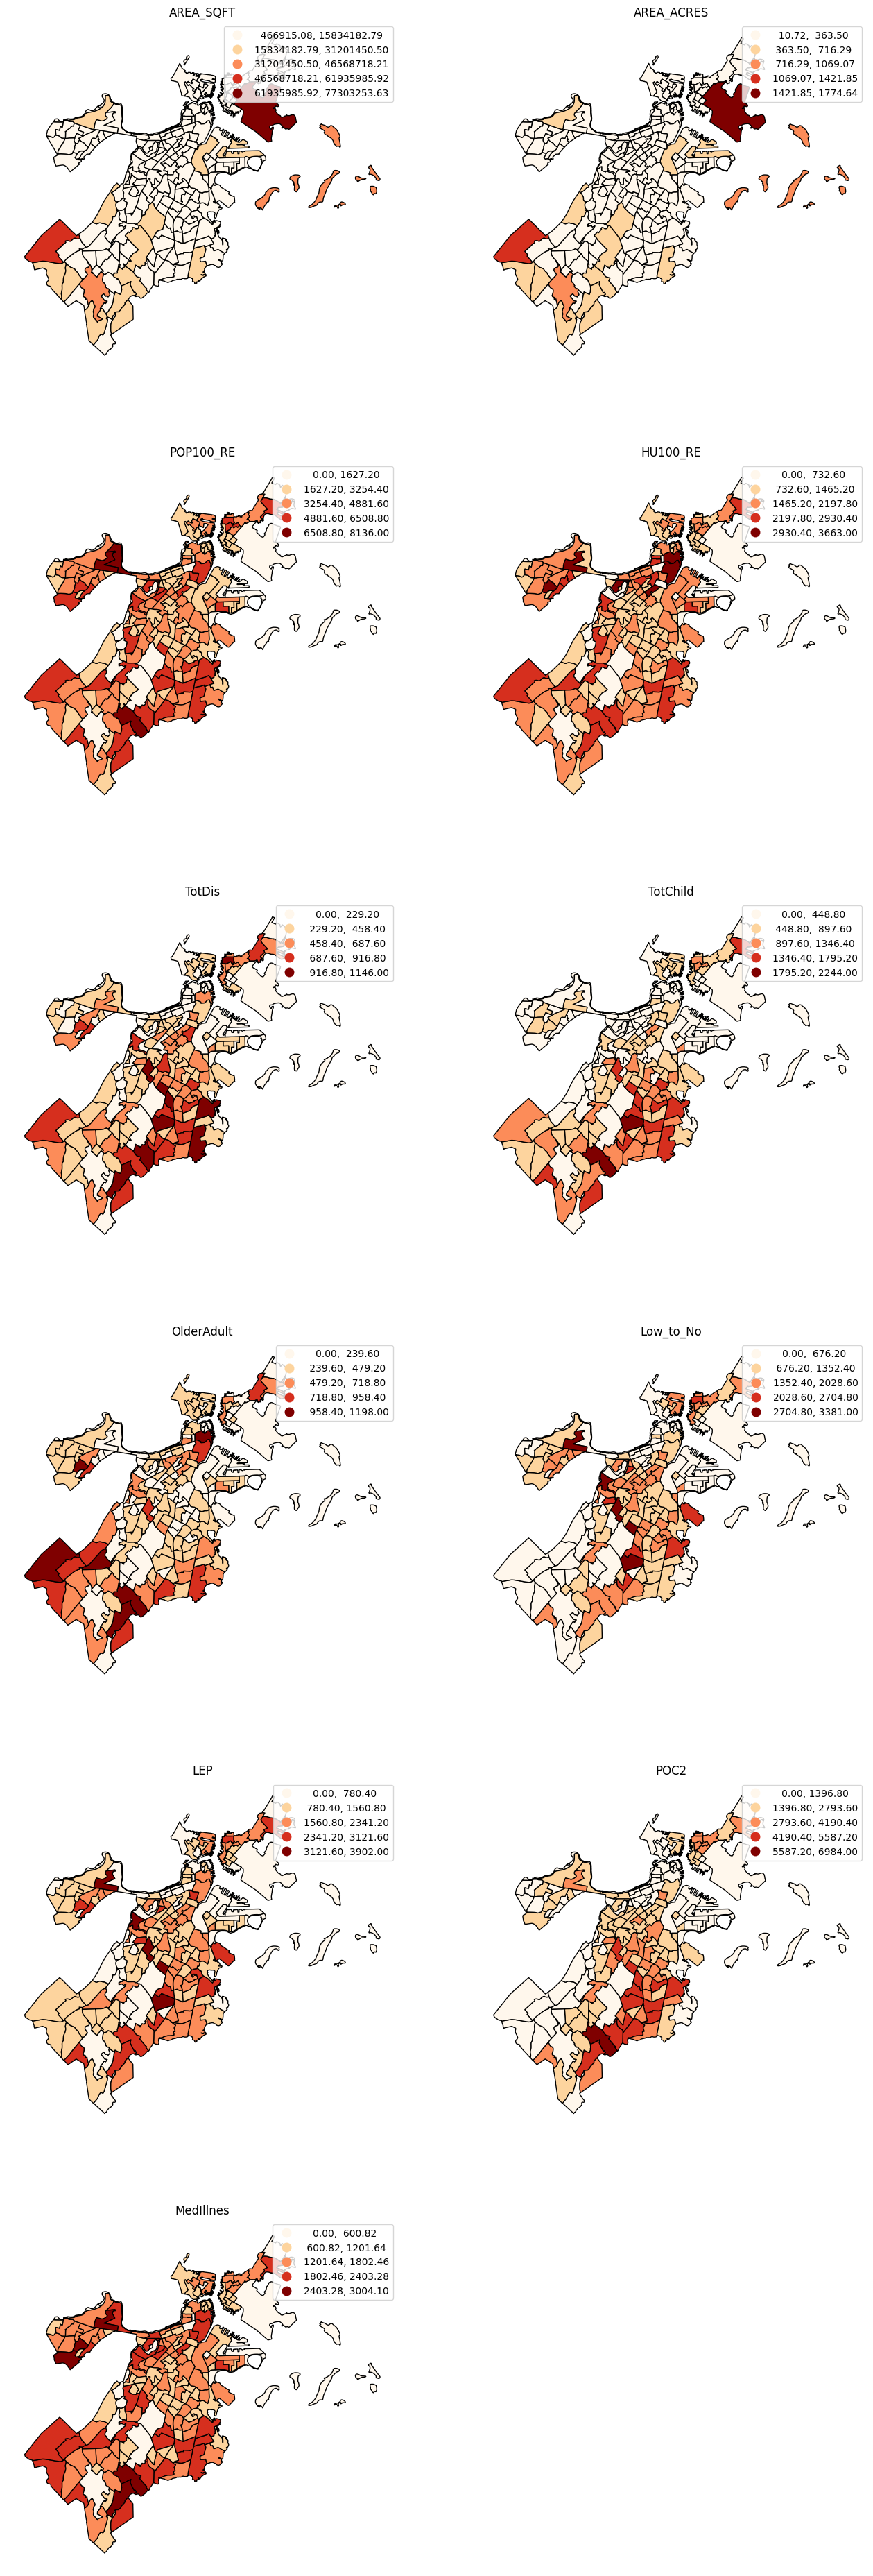

In [11]:
fig = create_plots_for_features(boston, features_to_graph)
fig.show()

## Merging Data

### Merging Childcare Data

#### Link to Data

https://data.boston.gov/dataset/boston-opportunity-agenda-state-of-early-early-education-and-care/

#### Data Definitions

| Field                        | Definition                                                                                     |
|------------------------------|------------------------------------------------------------------------------------------------|
| **Neighborhoods**             | 15 neighborhoods, as defined by this report                                                      |
| **PopBto5**                   | Population (in household) birth to 5 years old in that neighborhood                            |
| **Pop0to2**                   | Population (in household) birth to 2 years old in that neighborhood                            |
| **Pop3to5**                   | Population (in household) 3 to 5 years old in that neighborhood                                |
| **ParentLabFor**              | Population 0-5 years old with all parents in labor force in that neighborhood                   |
| **WhitePer**                  | Share of children (%) 0 - 4 years old that are White, non-Hispanic (Race/Ethnicity) in that neighborhood |
| **BlackPer**                  | Share of children (%) 0 - 4 years old that are Black (Race/Ethnicity) in that neighborhood      |
| **LatinxPer**                 | Share of children (%) 0 - 4 years old that are Hispanic or Latino (Race/Ethnicity) in that neighborhood |
| **AsianPer**                  | Share of children (%) 0 - 4 years old that are Asian (Race/Ethnicity) in that neighborhood      |
| **MarFam**                    | Share of married couple families (5) for children 0 - 5 years old (Family Type) in that neighborhood |
| **MalFam**                    | Share of male householder families (%) for children 0 - 5 years old (Family Type) in that neighborhood |
| **FemFam**                    | Share of female householder families (%) for children 0 - 5 years old (Family Type) in that neighborhood |
| **PovPer**                    | Share of children (%) 0 - 5 years old living in poverty (Poverty Status) in that neighborhood   |
| **MedianIncome**              | Median Family Income in the past 12 months (in 2017 inflation-adjusted dollars) in that neighborhood |
| **InfCostCareMedInc**         | Average cost of infant care as a percentage of median family income in that neighborhood        |
| **PreCostCareMedInc**         | Average cost of preschool care as a percentage of median family income in that neighborhood      |
| **InfCarAfford**              | Share of families that cannot afford infant care in that neighborhood                           |
| **PreCareAfford**             | Share of families that cannot afford preschool care in that neighborhood                        |

### Notes

- **Record Type**: Each record represents a ZIP-Code defined neighborhood. See list below for detailed information on Boston ZIP-Codes used to create each of the 15 neighborhoods.
- **Data Quality**: Numbers presented here came from 2013-2017 American Community Survey data. Therefore, these are **estimates** and have margin of errors. The smaller the geographical unit, the greater the margin of error. The Boston Planning & Development Agency analyzed the data to estimate numbers by ZIP-Code.
- **Race/Ethnicity**: Racial/ethnic subsets will not add to the total. Non-white Hispanic children may be double-counted.
- **Cost of Care**: The average cost of care as a percentage of median family income was computed assuming the annual average cost of infant care was **\$19,877** and the average cost of preschool care was **\$13,771** (Childcare Aware of America, 2019). For each neighborhood, we estimated the impact of child care (infant and preschool) on its median annual family income.
- **Affordability**: The Department of Health and Human Services (DHHS) sets a standard regarding the affordability of child care, where the annual cost of child care should not exceed **10%** of household annual income. Using this 10% threshold, we estimated that to afford market rate infant care, a family’s annual income would have to be at least **\$198,770**. The census income bracket closest to this income was a family income of **\$150,000–199,999**. To afford preschool care, a family's annual income should be at least **\$137,710**. Thus, the census income bracket that encompasses this income is **\$125,000 - 149,999**. For both infant and preschool care, we underestimated the number of families that can afford care.


In [14]:
childcare_data = pd.read_csv('./data/geographic-data/childcare-affordability-data.csv')

In [15]:
childcare_data.head(1)

,Neighborhoods,PopBto5,Pop0to2,Pop3to5,ParentLabFor,WhitePer,BlackPer,LatinxPer,AsianPer,MarFam,MalFam,FemFam,PovPer,MedianIncome,InfCostCareMedInc,PreCostCareMedInc,InfCarAfford,PreCareAfford,Unnamed: 18
0,Allston/Brighton,"2,619","1,527","1,092","1,833",41%,10%,20%,19%,76%,1%,24%,19%,"$75,777",26%,18%,83%,74%,NaN


In [16]:
list(childcare_data.columns)

['Neighborhoods',
 'PopBto5',
 'Pop0to2',
 'Pop3to5',
 'ParentLabFor',
 'WhitePer',
 ' BlackPer',
 ' LatinxPer',
 ' AsianPer',
 ' MarFam',
 ' MalFam',
 ' FemFam',
 ' PovPer',
 'MedianIncome',
 'InfCostCareMedInc',
 'PreCostCareMedInc',
 'InfCarAfford',
 'PreCareAfford',
 'Unnamed: 18']

In [17]:
childcare_data.shape

(998, 19)

In [18]:
childcare_data.dropna(how='all', inplace=True)

In [19]:
childcare_data.shape

(16, 19)

In [20]:
childcare_data.head(1)

,Neighborhoods,PopBto5,Pop0to2,Pop3to5,ParentLabFor,WhitePer,BlackPer,LatinxPer,AsianPer,MarFam,MalFam,FemFam,PovPer,MedianIncome,InfCostCareMedInc,PreCostCareMedInc,InfCarAfford,PreCareAfford,Unnamed: 18
0,Allston/Brighton,"2,619","1,527","1,092","1,833",41%,10%,20%,19%,76%,1%,24%,19%,"$75,777",26%,18%,83%,74%,NaN


In [21]:
childcare_data.drop(columns="Unnamed: 18", inplace=True)

In [22]:
childcare_data["Neighborhoods"]

0         Allston/Brighton
1     Back Bay/Beacon Hill
2           Central Boston
3              Charlestown
4               Dorchester
5              East Boston
6           Fenway/Kenmore
7                Hyde Park
8            Jamaica Plain
9                 Mattapan
10              Roslindale
11                 Roxbury
12            South Boston
13               South End
14            West Roxbury
15                  Boston
Name: Neighborhoods, dtype: object

In [23]:
def separate_ns(df):
    result_rows = []

    for _, row in df.iterrows():
        ns = str(row["Neighborhoods"]).split("/")
        for n in ns:
            new_row = row.copy()
            new_row["Neighborhoods"] = n
            result_rows.append(new_row)
            
    new_df = pd.DataFrame(result_rows)
    return new_df

childcare_data = separate_ns(childcare_data)

In [24]:
cd_ns = list(childcare_data["Neighborhoods"])
cd_ns

['Allston',
 'Brighton',
 'Back Bay',
 'Beacon Hill',
 'Central Boston',
 'Charlestown',
 'Dorchester',
 'East Boston',
 'Fenway',
 'Kenmore',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West Roxbury',
 'Boston']

In [25]:
set(cd_ns).intersection(b_ns)

{'Allston',
 'Back Bay',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'East Boston',
 'Fenway',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South End',
 'West Roxbury'}

In [26]:
set(cd_ns).difference(b_ns)

{'Beacon Hill', 'Boston', 'Central Boston', 'Kenmore'}

In [27]:
set(b_ns).difference(cd_ns)

{'Bay Village',
 'Harbor Islands',
 'Leather District',
 'Longwood Medical Area',
 'Mission Hill',
 'North End',
 'South Boston Waterfront',
 'West End'}

In [28]:
rename = {"Beacon Hill": "North End", "Central Boston": "Leather District", "Kenmore": "Fenway"}
g = lambda x: rename[x] if x in rename else x
childcare_data["Neighborhoods"] = childcare_data["Neighborhoods"].apply(g)

In [29]:
set(list(childcare_data["Neighborhoods"])).difference(b_ns)

{'Boston'}

In [30]:
bos_cc = gpd.GeoDataFrame(pd.merge(boston, childcare_data, how='left',  left_on="Name", right_on="Neighborhoods"))

In [31]:
bos_cc = bos_cc.rename(columns={
    ' BlackPer': 'BlackPer',
     ' LatinxPer': 'LatinxPer',
     ' AsianPer': 'AsianPer',
     ' MarFam': 'MarFam',
     ' MalFam': 'MalFam',
     ' FemFam': 'FemFam',
     ' PovPer': 'PovPer'
})

In [32]:
bos_cc.columns

Index(['FID', 'GEOID10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'LEP', 'POC2',
       'MedIllnes', 'Name', 'Shape__Are', 'Shape__Len', 'geometry',
       'Neighborhoods', 'PopBto5', 'Pop0to2', 'Pop3to5', 'ParentLabFor',
       'WhitePer', 'BlackPer', 'LatinxPer', 'AsianPer', 'MarFam', 'MalFam',
       'FemFam', 'PovPer', 'MedianIncome', 'InfCostCareMedInc',
       'PreCostCareMedInc', 'InfCarAfford', 'PreCareAfford'],
      dtype='object')

In [33]:
def convert_pcts(df, features):
    g = lambda x: float(x.strip('%')) / 100
    for f in features:
        df[f] = df[f].apply(
            lambda x: g(x) if pd.notna(x) and type(x) == str else x
        )

convert_pcts(bos_cc, [
    'WhitePer', 'BlackPer',
    'LatinxPer', 'AsianPer',
    'MarFam', 'MarFam',
    'FemFam', 'PovPer',
    'InfCostCareMedInc', 'PreCostCareMedInc',
    'InfCarAfford', 'PreCareAfford'
])

In [34]:
def convert_dollars(df, features):
    g = lambda x: float(''.join(x.strip('$').split(',')))
    for f in features:
        df[f] = df[f].apply(
            lambda x: g(x) if pd.notna(x) and type(x) == str else x
        )

convert_dollars(bos_cc, ['MedianIncome'])

<Axes: >

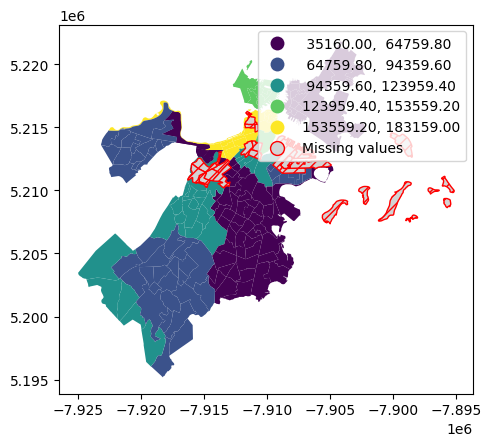

In [35]:
bos_cc.plot(
    column="MedianIncome",
    legend=True,
    scheme="equal_interval",
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    }
)

### Merging Boston Neighborhood Data

In [36]:
n_data = pd.read_csv(
    './data/geographic-data/boston-neighborhood-data-2020.csv',
    header=1    
)

In [37]:
n_data.head()

,field concept,Total:,White alone,Black or African American alone,Hispanic or Latino,"Asian, Native Hawaiian and Pacific Islander alone, all ages","Other Races or Multiple Races, all ages",Total:.1,White alone.1,Black or African American alone.1,...,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant,household size
0,Allston,24904,12536,1326,3259,6271,1512,23140,11976,1184,...,0,0,3281,3214,0,67,10748,10027,721,2.156478
1,Back Bay,18190,13065,690,1208,2410,817,17042,12349,641,...,269,0,1610,1487,0,123,11524,10006,1518,1.630122
2,Beacon Hill,9336,7521,252,537,630,396,8603,6980,231,...,0,0,33,0,0,33,6037,5485,552,1.696080
3,Brighton,52047,32694,2414,5376,8703,2860,47657,30752,2076,...,266,56,3796,3493,0,303,23653,22535,1118,2.126292
4,Charlestown,19120,13626,990,2075,1650,779,15661,11689,662,...,55,0,55,0,30,25,9525,8932,593,2.128303


In [38]:
n_data_features = list(n_data.columns)
for i, name in enumerate(n_data_features):
    print(i, name)

0 field concept
1 Total:
2 White alone
3 Black or African American alone
4 Hispanic or Latino
5 Asian, Native Hawaiian and Pacific Islander alone, all ages
6 Other Races or Multiple Races,  all ages
7 Total:.1
8 White alone.1
9 Black or African American alone.1
10 Hispanic or Latino.1
11 Asian, Native Hawaiian and Pacific Islander alone, aged 18+
12 Other Races or Multiple Races, aged 18+
13 Total: aged 0-17
14 White alone, aged 0-17
15 Black or African American alone, aged 0-17
16 Hispanic or Latino, aged 0-17
17 Asian, Native Hawaiian and Pacific Islander alone, aged 0-17
18 Other Races or Multiple Races, aged 0-17
19 household population
20 Total:.2
21 Institutionalized population:
22 Correctional facilities for adults
23 Juvenile facilities
24 Nursing facilities/Skilled-nursing facilities
25 Other institutional facilities
26 Noninstitutionalized population:
27 College/University student housing
28 Military quarters
29 Other noninstitutional facilities
30 Total:.3
31 Occupied
32 Vac

In [39]:
fs = n_data_features
desired_features = [fs[0], fs[1], fs[2], fs[3], fs[4], fs[5], fs[6], fs[21], fs[22], fs[23], fs[24], fs[27], fs[28], fs[31], fs[32], fs[33]]
n_data = n_data[desired_features]

In [40]:
n_data.columns

Index(['field concept', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races or Multiple Races,  all ages',
       'Institutionalized population:', 'Correctional facilities for adults',
       'Juvenile facilities', 'Nursing facilities/Skilled-nursing facilities',
       'College/University student housing', 'Military quarters', 'Occupied',
       'Vacant', 'household size'],
      dtype='object')

In [41]:
n_data = n_data.rename(columns={
    'field concept': 'Name',
    'Total:': 'Total',
    'White alone': 'WhiteAl',
    'Black or African American alone': 'BlackAl',
    'Asian, Native Hawaiian and Pacific Islander alone, all ages': 'AsianAl',
    'Hispanic or Latino': 'Latino',
    'Other Races or Multiple Races,  all ages': 'Mixed',
    'Institutionalized population:': 'InstitutionalizedPop',
    'Correctional facilities for adults': 'CorrectionalFacilitiesAdult',
    'JuvenileFacilities': 'CorrectionalFacilitiesforJuveniles',
    'Nursing facilities/Skilled-nursing facilities': 'NursingFacilities',
    'College/University student housing': 'UnivHousing',
    'Military quarters': 'MilitaryQuarters',
     'household size': 'HouseholdSize'
})

In [42]:
n_data.head()

,Name,Total,WhiteAl,BlackAl,Latino,AsianAl,Mixed,InstitutionalizedPop,CorrectionalFacilitiesAdult,Juvenile facilities,NursingFacilities,UnivHousing,MilitaryQuarters,Occupied,Vacant,HouseholdSize
0,Allston,24904,12536,1326,3259,6271,1512,0,0,0,0,3214,0,10027,721,2.156478
1,Back Bay,18190,13065,690,1208,2410,817,269,0,0,269,1487,0,10006,1518,1.630122
2,Beacon Hill,9336,7521,252,537,630,396,0,0,0,0,0,0,5485,552,1.696080
3,Brighton,52047,32694,2414,5376,8703,2860,335,0,13,266,3493,0,22535,1118,2.126292
4,Charlestown,19120,13626,990,2075,1650,779,55,0,0,55,0,30,8932,593,2.128303


In [43]:
set(n_data["Name"]).difference(b_ns)

{'Beacon Hill', 'Chinatown', 'Downtown', 'Longwood'}

In [44]:
rename = {"Beacon Hill": "North End",
          "Chinatown": "Leather District",
          "Longwood": "Mission Hill",
          "Downtown": "Leather District"}
g = lambda x: rename[x] if x in rename else x
n_data["Name"] = n_data["Name"].apply(g)

In [45]:
set(n_data["Name"]).difference(b_ns)

set()

In [46]:
bos_cc_nd = gpd.GeoDataFrame(pd.merge(boston, n_data, how='left',  left_on="Name", right_on="Name"))
bos_cc_nd.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,...,Mixed,InstitutionalizedPop,CorrectionalFacilitiesAdult,Juvenile facilities,NursingFacilities,UnivHousing,MilitaryQuarters,Occupied,Vacant,HouseholdSize
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,...,175.0,0.0,0.0,0.0,0.0,4624.0,0.0,317.0,49.0,1.772871
1,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,...,800.0,116.0,0.0,4.0,112.0,1502.0,0.0,6668.0,287.0,2.361278
2,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,...,2035.0,314.0,53.0,0.0,261.0,14960.0,0.0,13273.0,1352.0,1.658254
3,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,...,817.0,269.0,0.0,0.0,269.0,1487.0,0.0,10006.0,1518.0,1.630122
4,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,...,817.0,269.0,0.0,0.0,269.0,1487.0,0.0,10006.0,1518.0,1.630122
